In [57]:
import glob
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

evaluation_methods = ['ari', 'nmi', 'purity']
ari_best_result = dict()
nmi_best_result = dict()
purity_best_result = dict()


In [58]:
total = 0
for dirs in glob.glob('beta/*'):
    for em in evaluation_methods:
        with open(dirs + '/' + em + '/total_best_result.txt') as f:
            lines = f.read().splitlines()
            for i, line in enumerate(lines):
                if i == 0: continue
                line = line.split('=')[-1].split(':')
                k, v = line[0].strip(), line[-1].strip()
                if em == 'ari':
                    if k in ari_best_result:
                        ari_best_result[k] += float(v)
                    else:
                        ari_best_result[k] = float(v)
                elif em == 'nmi':
                    if k in nmi_best_result:
                        nmi_best_result[k] += float(v)
                    else:
                        nmi_best_result[k] = float(v)
                else:
                    if k in purity_best_result:
                        purity_best_result[k] += float(v.split('%')[0])
                    else:
                        purity_best_result[k] = float(v.split('%')[0])
    total += 1


In [59]:
for k, v in ari_best_result.items():
    ari_best_result[k] = round(v / total, 3)
for k, v in nmi_best_result.items():
    nmi_best_result[k] = round(v / total, 3)
for k, v in purity_best_result.items():
    purity_best_result[k] = round(v / total, 1)

print(ari_best_result)
print(nmi_best_result)
print(purity_best_result)

{'jideca_b02r01re_34': 0.29, 'jideca_b10r01re_34': 0.267, 'jideca_b05r01se_34': 0.245, 'jideca_b01r01re_34': 0.24, 'jideca_b10r01se_34': 0.229, 'jideca_b1r01se_34': 0.217, 'jideca_b02r01se_34': 0.22, 'jideca_b01r01se_34': 0.212, 'jideca_b1r01re_34': 0.196, 'jideca_b05r01re_34': 0.185}
{'jideca_b10r01re_34': 0.533, 'jideca_b02r01re_34': 0.522, 'jideca_b01r01re_34': 0.509, 'jideca_b05r01se_34': 0.487, 'jideca_b10r01se_34': 0.49, 'jideca_b1r01se_34': 0.476, 'jideca_b02r01se_34': 0.474, 'jideca_b1r01re_34': 0.464, 'jideca_b05r01re_34': 0.461, 'jideca_b01r01se_34': 0.463}
{'jideca_b02r01re_34': 33.1, 'jideca_b10r01se_34': 30.6, 'jideca_b01r01se_34': 32.0, 'jideca_b01r01re_34': 26.0, 'jideca_b10r01re_34': 31.6, 'jideca_b1r01se_34': 28.4, 'jideca_b02r01se_34': 27.9, 'jideca_b05r01se_34': 29.1, 'jideca_b1r01re_34': 23.6, 'jideca_b05r01re_34': 24.0}


In [71]:
df_ari = pd.DataFrame(list(ari_best_result.items()), columns=['parameters', 'ari'])
df_nmi = pd.DataFrame(list(nmi_best_result.items()), columns=['parameters', 'nmi'])
df_purity = pd.DataFrame(list(purity_best_result.items()), columns=['parameters', 'purity'])


df_ari['simple'] = df_ari['parameters'].apply(lambda x: x.split('_')[1].split('r')[0][1:])
df_ari['simple'] = df_ari['simple'].apply(lambda x: float('0.' + x[1]) if x[0] == '0' else float(x))
df_ari['types'] = df_ari['parameters'].apply(lambda x:x.split('_')[1][-2:])

df_nmi['simple'] = df_nmi['parameters'].apply(lambda x:x.split('_')[1].split('r')[0][1:])
#df_nmi['simple'] = df_nmi['simple'].apply(lambda x: float('0.' + x[1]) if x[0] == '0' else float(x))
df_nmi['simple'] = df_nmi['simple'].apply(lambda x: '0.' + x[1] if x[0] == '0' else x)
df_nmi['types'] = df_nmi['parameters'].apply(lambda x:x.split('_')[1][-2:])

df_purity['simple'] = df_purity['parameters'].apply(lambda x:x.split('_')[1].split('r')[0][1:])
df_purity['simple'] = df_purity['simple'].apply(lambda x: float('0.' + x[1]) if x[0] == '0' else float(x))
df_purity['types'] = df_purity['parameters'].apply(lambda x:x.split('_')[1][-2:])


In [73]:
df_ari.to_csv('ari_means.csv')
df_nmi.to_csv('nmi_means.csv')
df_purity.to_csv('purity_means.csv')

Text(0.5, 0, '')

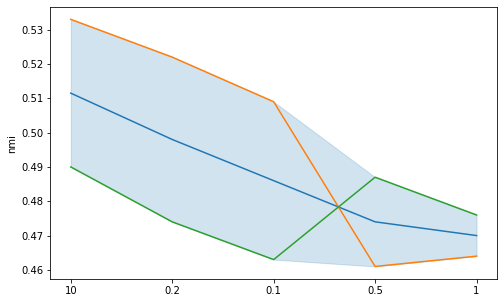

In [72]:
plt.figure(figsize=(8,5))
sns.lineplot(x='simple', y='nmi', data=df_nmi)
sns.lineplot(x='simple', y='nmi', data=df_nmi.loc[df_nmi['types'] == 're'])
sns.lineplot(x='simple', y='nmi', data=df_nmi.loc[df_nmi['types'] == 'se'])
plt.xlabel(None)